# Framing the Problem
The objective of this report is to employ univariate linear regression models to forecast California's median home value.  Our goal is to determine which of the separate factors listed below most accurately predicts home number:
- Population Growth the quantity of households
- average earnings

This analysis will help stakeholders understand key drivers of housing prices.

# # Getting the Data
I use the [California Housing Prices Dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

In [16]:
# Importing Required Libraries
%pip install seaborn scikit-learn
import pandas as pd                      # For data loading and manipulation
import seaborn as sns                    # For visualization (optional in this block)
import matplotlib.pyplot as plt          # For plotting graphs
from sklearn.linear_model import LinearRegression      # For creating a linear regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error  # For evaluating model performance


df = pd.read_csv(r"D:\Applied AI & ML\Foundation of Machine learning frameworks\archive\housing.csv")


# Display the first 5 rows of the dataset to understand its structure
df.head()


Note: you may need to restart the kernel to use updated packages.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# # Exploratory Data Analysis (EDA)

In [17]:

from IPython.display import display

# Load the dataset
df = pd.read_csv(r"D:\Applied AI & ML\Foundation of Machine learning frameworks\archive\housing.csv")

# Show summary stats in a clean table with rounded values
display(df.describe().round(2))


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


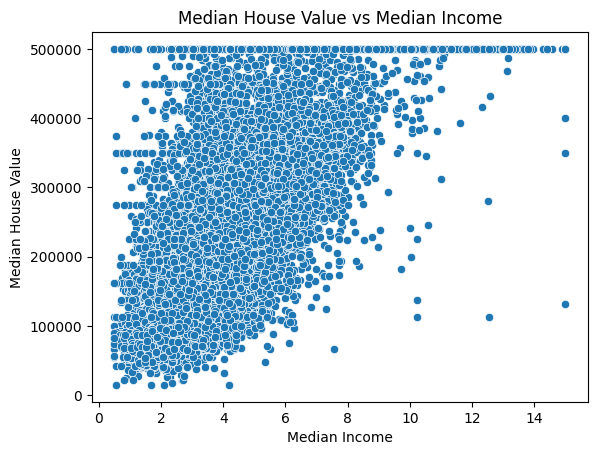

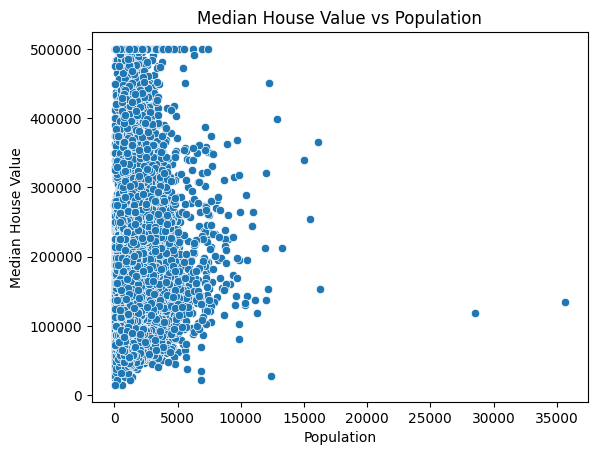

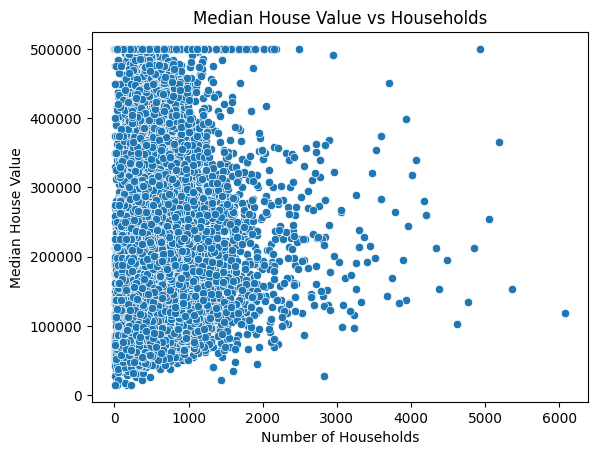

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot 1: Median Income vs Median House Value
# This helps visualize the relationship between how much people earn and house prices.
sns.scatterplot(x='median_income', y='median_house_value', data=df)
plt.title("Median House Value vs Median Income")
plt.xlabel("Median Income")              
plt.ylabel("Median House Value")
plt.show()

# Scatter Plot 2: Population vs Median House Value
# This checks whether areas with more people tend to have higher or lower house values.
sns.scatterplot(x='population', y='median_house_value', data=df)
plt.title("Median House Value vs Population")
plt.xlabel("Population")                
plt.ylabel("Median House Value")
plt.show()

# Scatter Plot 3: Households vs Median House Value
# This explores if the number of households in an area affects housing prices.
sns.scatterplot(x='households', y='median_house_value', data=df)
plt.title("Median House Value vs Households")
plt.xlabel("Number of Households")
plt.ylabel("Median House Value")
plt.show()


###  Variable Observations

1. **`median_income`**  
   Represents the median income of households in a block (in tens of thousands of dollars).  
   - **Range**: ~0.5 to 15  
   - **Observation**: Higher income tends to correlate with higher house values.

2. **`median_house_value`**  
   The median house price in a block (in dollars).  
   - **Range**: ~15,000 to 500,000 (capped)  
   - **Observation**: Many values cluster near the upper limit, suggesting a price cap.

3. **`population`**  
   Total number of people living in a block.  
   - **Range**: ~3 to 35,000  
   - **Observation**: No clear correlation with house value, large variance between blocks.

4. **`households`**  
   Number of households in a block.  
   - **Range**: ~1 to 6,000  
   - **Observation**: Similar to population, but with less variation.


# # Linear Regression Models

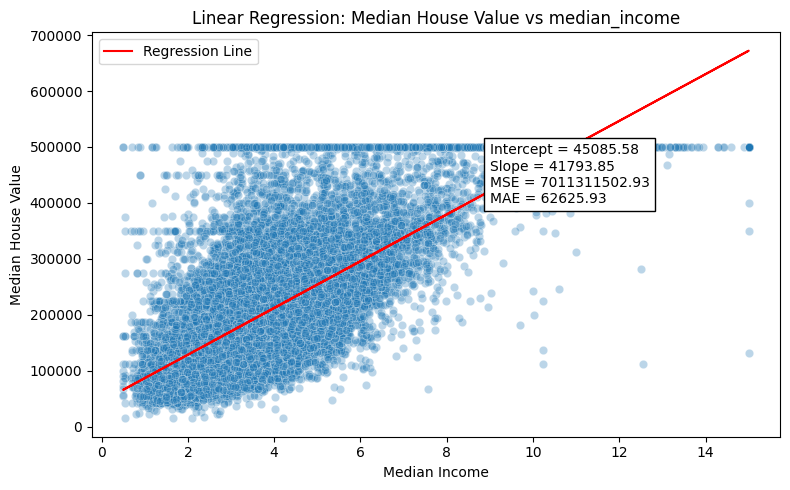

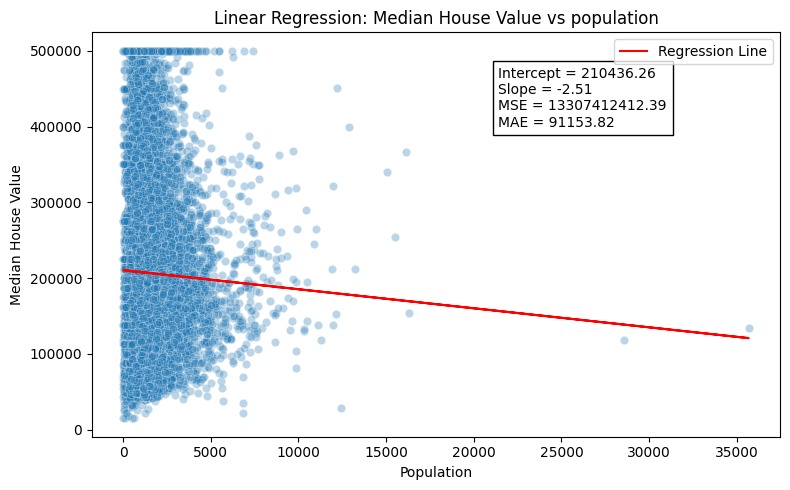

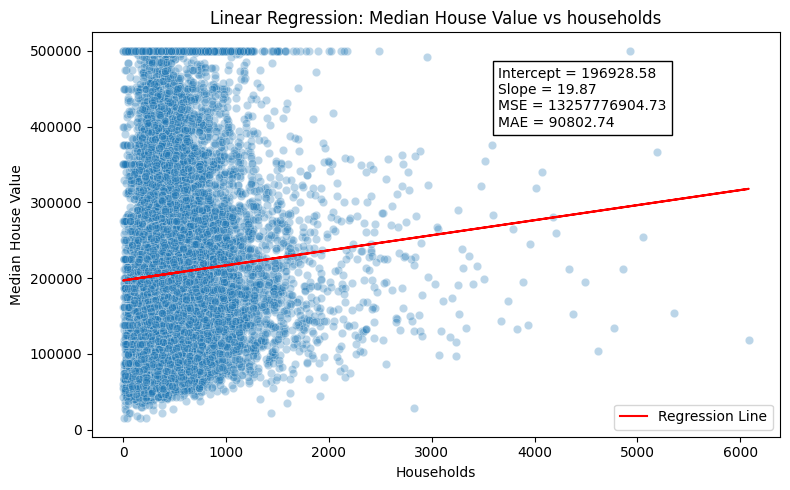

In [19]:

# Define a function to run simple linear regression on a single feature (X_col)
def run_linreg(X_col):
    X = df[[X_col]]                      
    y = df["median_house_value"]        

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    return (
        model.intercept_,
        model.coef_[0],
        mean_squared_error(y, y_pred),
        mean_absolute_error(y, y_pred),
        y_pred
    )

# Dictionary to store results for each variable
results = {}

# Loop over selected features and apply linear regression
for var in ["median_income", "population", "households"]:
    intercept, slope, mse, mae, y_pred = run_linreg(var)

    results[var] = {
        "Intercept": intercept,
        "Slope": slope,
        "MSE": mse,
        "MAE": mae
    }

    # Plot scatter and regression line
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=var, y="median_house_value", data=df, alpha=0.3)
    plt.plot(df[var], y_pred, color="red", label="Regression Line")
    plt.title(f"Linear Regression: Median House Value vs {var}")
    plt.xlabel(var.replace("_", " ").title())
    plt.ylabel("Median House Value")

    # Add regression metrics to the plot
    plt.text(
        0.6 * df[var].max(), 0.8 * df["median_house_value"].max(),
        f"Intercept = {intercept:.2f}\nSlope = {slope:.2f}\nMSE = {mse:.2f}\nMAE = {mae:.2f}",
        bbox=dict(facecolor='white', edgecolor='black')
    )

    plt.legend()
    plt.tight_layout()
    plt.show()


In [20]:
# Convert regression results into a DataFrame
summary_df = pd.DataFrame(results).T 
summary_df.index.name = "Feature"
summary_df = summary_df.round(2)      

# Display the summary table
print("Summary Table of Linear Regression Models")
display(summary_df)


Summary Table of Linear Regression Models


,Intercept,Slope,MSE,MAE
Feature,,,,
median_income,45085.58,41793.85,7.011312e+09,62625.93
population,210436.26,-2.51,1.330741e+10,91153.82
households,196928.58,19.87,1.325778e+10,90802.74


# Conclusion

After fitting three univariate linear regression models, we observed the following:

- **Median Income**: highest correlation with the median home value.  The MSE and MAE figures it generated were the lowest.  The rising trend is well-captured by the regression line.
- **Population**: very poor linear correlation.  The fitted line does not adequately depict the data, and the scatter plot is widely scattered.
- **Number of Households**: is still far lower than median income, but it has a little better trend than the population.
 **Final Insight**:
The model using **median income** as the most trustworthy factor for estimating home prices is the separate variable.  It offers lowest errors in forecasting and a distinct trend.  As a result, we advise using it as the main variable in basic linear models.